<h1 style="color:blue">Introduction au traitement d’images</h1>
<h3>IUT Département INFORMATIQUE BORDEAUX<br/>Nicholas Journet, Antoine Pirrone, Stéphane Fosse</h3>

# Objectif de la séance

* Transformation 2D (translation, rotation, homotéthie)
* Opérations morphologiques
* Convolution (trouver des contours, flouter une image, enlever du bruit)

## Translation, rotation, homotéthie : comment enchainer les opérations ?

### Translation

<img src="images_slides/t1.png" width=50%>


$x'=x+T_x et Y'=y+T_y$

avec $T_x$ et $T_y$ la translation en $x$ et $y$

### Rotation autour de l'origine

<img src="images_slides/t2.png" width=30%>

$x'=x \cos(\theta)-y\sin(\theta)$

$y'=y \cos(\theta)+x\sin(\theta)$

avec $\theta$ le sens de l'angle de rotation dans le sens positif.


Démonstration:

Par définition $x=r\cos(a)$ et $y=r\sin(a)$

Après rotation d'angle $\theta$ :

$x'=r\cos(a+\theta)$ et $y'=r\sin(a+\theta)$

$x'=r\cos(a) \cos(\theta)- r \sin(\theta) \sin(a)$

$y'=r\cos(a)\sin(\theta)+r\cos(\theta)\sin(a)$

et comme : $x=r\cos(a)$ et $y=r\sin(a)$

$x'=x \cos(\theta)-y\sin(\theta)$

$y'=y \cos(\theta)+x\sin(\theta)$



Les transformations ne sont pas commutatives

rotation o translation $\neq$  translation o rotation 

<img src="images_slides/t5.png" width=50%>



Par contre, on peut inverser 2 rotations et 2 translations:
* Rotation1 o Rotation2 = Rotation2 o Rotation1
* item Translation1 o Translation2 = Translation2 o Translation1

<img src="images_slides/t6.png" width=50%>
    
### Changement d'échelle

Changement d'échelle par rapport à l'origine.

$$x'=S_x.x$$

$$y'=S_y.y$$

Avec $S_x$ et $S_y$ sont les facteurs d'agrandissement ou de réduction.

## Enchainer les opérations : représentation matricielle


### Une matrice = une transformation

Rotation :$$ \begin{bmatrix}
x' \\
y'
\end{bmatrix} 
= 
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix} 
\begin{bmatrix}
x \\
y \\
\end{bmatrix} \rightarrow
\begin{bmatrix}
x'\\
y'\\
\end{bmatrix} 
=
\begin{bmatrix}
x\cos \theta  -y\sin \theta \\
y\cos \theta  +x\sin \theta \\
\end{bmatrix} 
$$


Mise à l'échelle :
$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix}
=
\begin{bmatrix}
S_x&0 \\
0&S_y
\end{bmatrix} 
\begin{bmatrix}
x\\
y
\end{bmatrix} 
\rightarrow
x'=S_x.x$$ et 
$$y'=S_y.y$$





Translation :

$$
\begin{bmatrix}
x'\\
y'
\end{bmatrix} 
=
\begin{bmatrix}
x\\
y
\end{bmatrix} 
+
\begin{bmatrix}
T_x\\
T_y
\end{bmatrix} 
$$
Représentation matricielle impossible. On utilise les coordonnées homogènes


### Coordonnées homogènes

Coordonnées homogènes (on ajoute une dimension):

$$(x,y)\rightarrow (x,y,1)$$

Exemple de la translation

$$
\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix} 
=
\begin{bmatrix}
1&0&T_x\\
0&1&T_y\\
0&0&1
\end{bmatrix} 
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix} 
$$


Changement d'échelle :
$$
\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix} 
=
\begin{bmatrix}
S_x&0&0\\
0&S_y&0\\
0&0&1
\end{bmatrix} 
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix} 
$$


Rotation:
$$
\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix} 
=
\begin{bmatrix}
\cos \theta&-sin \theta &0\\
\sin\theta &\cos \theta &0\\
0&0&1
\end{bmatrix} 
\begin{bmatrix}
x\\
y\\
1
\end{bmatrix} 
$$

### Composition de transformations

$$T_1(T_{x_1},T_{y_1}).T_2(T_{x_2},T_{y_2})=T_3(T_{x_1}+T_{x_2},T_{y_1}+T_{y_2})$$
$$S_1(S_{x_1},S_{y_1}).S_2(S_{x_2},S_{y_2})=S_3(S_{x_1}.S_{x_2},S_{y_1}.S_{y_2})$$
$$R_1(\theta_1).R_2(\theta_2)=R_3(\theta_1+\theta_2)$$


$$M_{st}=S(S_x,S_y).T(T_x,T_y)=
\begin{bmatrix}
S_x&0&S_x.T_x\\
0&S_y&S_y.T_y\\
0&0&1
\end{bmatrix} 
$$

### A vous de jouer

* Calculer la forme générale de la matrice correspondant à  $M_{ts}=T(T_x,T_y).S(S_x,S_y)$
* Pour cette matrice, calculer la valeur exacte de cette matric pour $t=(100,50)$ et $S=(0.5,0.5)$




Data type: float64

Inverse of scale matrix: 
[[ 0.5 -0.   0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   1. ]]


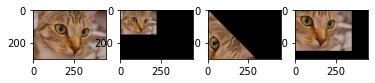

In [69]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float, transform as tf
    

img = img_as_float(data.chelsea())
print(f'Data type: {img.dtype}')

# tf.SimilarityTransform opère sur des tableaux 2D

# Homothétie (scale)
scale = tf.SimilarityTransform(scale=0.5)

rotation = tf.SimilarityTransform(rotation=math.pi/4)

translation = tf.SimilarityTransform(translation=(100, 50))


print(f'\nInverse of scale matrix: \n{scale.params}')

# Appliquons maintenant cette transformation à une image. 
# Comme nous essayons de reconstruire l'image après la transformation, 
# il n'est pas utile de voir où une coordonnée de l'image d'entrée se retrouve dans la sortie i.e 
# ce que la transformation nous donne. 

# Au lieu de cela, pour chaque pixel (coordonnée) de l'image de sortie, 
# nous voulons savoir d'où il provient dans l'image d'entrée. C'est pourquoi nous devons 
# utiliser l'inverse de la matrice, plutôt que matrice directement.

# Applique la transormation à l'image
# La notation matrix.inverse permet d'inverser la transformation (zoom in VS zoom out etc)
scaled_img = tf.warp(img, scale.inverse)

rotated_img = tf.warp(img, rotation.inverse)

translated_img = tf.warp(img, translation)

fig, ax = plt.subplots(ncols=4)

ax[0].imshow(img)
ax[1].imshow(scaled_img)
ax[2].imshow(rotated_img)
ax[3].imshow(translated_img)



### Expérimentation

La méthode SimilarityTransform vous impose l'ordre des transformation. C'est à vous de multiplier les matrices pour composer les transformations. Compléter le code ci-dessous pour valider expérimentalement que $M_{st}\neq M_{ts}$






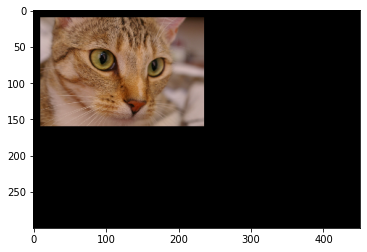

In [70]:

import numpy as np
from skimage import transform as tf

scale =  tf.SimilarityTransform(scale=0.5)
shift = tf.SimilarityTransform(translation=(10, 10))
rotation = tf.SimilarityTransform(rotation=math.pi/4)


# multiplication des matrices
matrix=np.dot(shift.params, scale.params)

tform = tf.SimilarityTransform(matrix)
tf_img = tf.warp(img, tform.inverse)
fig, ax = plt.subplots()
_ = ax.imshow(tf_img)


#A VOUS DE COMPLETER





## Opréations sur les images binaires

<img src="images_slides/morpho1.png" width=50%>



### Erosion : suprrimer du bruit dans une image

<img src="images_slides/morpho2.png" width=50%>

A propos de l'élément structurant et du noyeau: On passe le noyeau B sur chacun des pixels de l'image A. On effectue soit une rosion soit une dilatation. 

Erosion: On ne conserve le pixel du noyeau que si l'ensemble des pixels du de l'lément structurant sont allumés (1) car on parle d'image en noir et blanc (binaire). L'érosion permet de supprimer le bruit mais a aussi pour effet de shrink le reste des formes de l'image

<img src="images_slides/morpho4.png" width=50%>



Type of square: <class 'numpy.ndarray'>


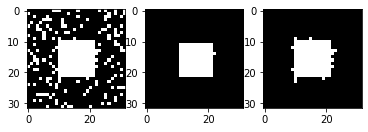

In [71]:
# Génération d'un carré avec quelques pixels blancs symbolisant du bruit
# Objectif : supprimer ces petits carrés blancs

import numpy as np
from scipy import ndimage # n dimensional image
import matplotlib.pyplot as plt
from skimage.morphology import square, erosion

square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1

np.random.seed(2)

# On tire aléatoirement les pixels de bruit                                           
# un array de 2 sur 100 avec des valeurs entre 0 et 32
x, y = (32*np.random.random((2, 200))).astype(int)
square[x, y] = 1

print(f'Type of square: {type(square)}')

eroded_square = ndimage.binary_erosion(square, structure=np.ones((2,2)))
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)

fig, ax = plt.subplots(ncols=3)

ax[0].imshow(square, cmap='gray', interpolation='nearest')
ax[1].imshow(eroded_square, cmap='gray', interpolation='nearest')
ax[2].imshow(reconstruction, cmap='gray')

#from http://gael-varoquaux.info/scipy-lecture-notes/advanced/image_processing/index.html

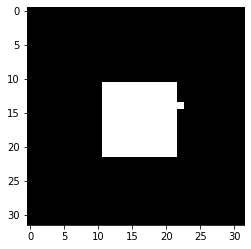

In [72]:
#open_square = ndimage.binary_opening(square)
#Erosion du carré
from scipy import ndimage

np.random.seed(2)

square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1

x, y = (32*np.random.random((2, 200))).astype(int)
square[x, y] = 1

eroded_square = ndimage.binary_erosion(square, structure=np.ones((2,2)))
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)
plt.imshow(eroded_square, cmap='gray', interpolation='nearest')

### Erosion = supprimer des petits bruits, difficulté de choisir le bon élément structurant

<img src="images_slides/morpho4.png" width=40%>

### A vous de jouer
Trouver la bonne taille de l'élément structurant (carré) permettant du supprimer du bruit sans trop altérer la forme du photographe.
<img src="images_slides/toDoMorpho.png" width=80%>

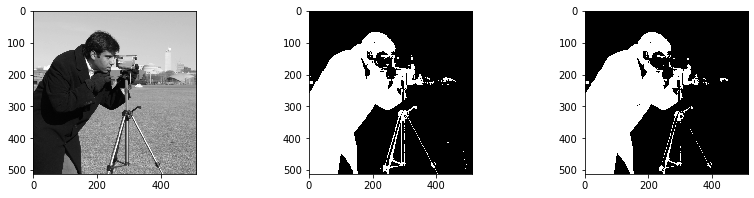

In [73]:
from skimage.util import random_noise
image = data.camera()


thresh_min = 100 # threshold_minimum(image)
binary_min = image < thresh_min


eroded_img = ndimage.binary_erosion(binary_min, structure=np.ones((2, 2)))
#reconstruction = ndimage.binary_propagation(eroded_square, mask=square)


plt.figure(figsize=(14, 3))
plt.subplot(131)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.subplot(132)
plt.imshow(binary_min, cmap='gray', interpolation='nearest')
plt.subplot(133)
plt.imshow(eroded_img, cmap='gray', interpolation='nearest')



### Dilatation : Combler les trous

<img src="images_slides/morpho5.png" width=40%>

Principe de dilatation: On allume le pixel du noyeau si n'importe quel pixel de l'élément structurant est allumé

<img src="images_slides/morpho6.png" width=30%>
<img src="images_slides/morpho7.png" width=30%>

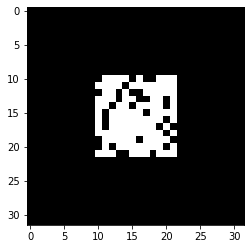

In [74]:
#Génération d'un carré avec quelques pixels blancs symbolisant du bruit
#Objectif : supprimer ces petits carrés blancs
from skimage.morphology import square
from skimage.morphology import erosion
from skimage.morphology import dilation

from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
np.random.seed(2)
                             
                                           
#on tire aléatoirement les pixels de bruit                                           
#un array de 2 sur 100 avec des valeurs entre 0 et 32
x, y = (32*np.random.random((2, 200))).astype(int)
square[x, y] = 0
plt.imshow(square, cmap='gray', interpolation='nearest')



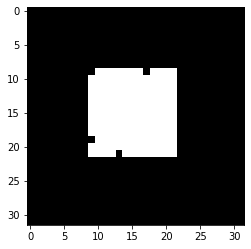

In [75]:
eroded_square = ndimage.binary_dilation(square, structure=np.ones((2,2)))
#reconstruction = ndimage.binary_propagation(eroded_square, mask=square)
plt.imshow(eroded_square, cmap='gray', interpolation='nearest')

### A vous de jouer.
Faites en sorte de faire diminuer le nombre de points noirs dans la veste du caméraman

<img src="images_slides/dilat.png" width=80%>

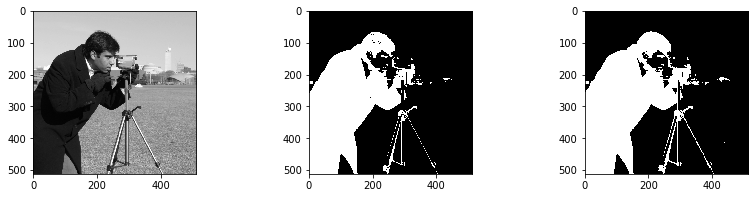

In [95]:
from skimage.util import random_noise
image = data.camera()


thresh_min = 75 # threshold_minimum(image)
binary_min = image < thresh_min


dilated_img = ndimage.binary_dilation(binary_min, structure=np.ones((2, 2)))
# reconstruction = ndimage.binary_propagation(eroded_square, mask=square)


plt.figure(figsize=(14, 3))

plt.subplot(131)
plt.imshow(image, cmap='gray', interpolation='nearest')

plt.subplot(132)
plt.imshow(binary_min, cmap='gray', interpolation='nearest')

plt.subplot(133)
plt.imshow(dilated_img, cmap='gray', interpolation='nearest')


### importance du choix de l'élément structurant

<img src="images_slides/morpho14.png" width=60%>

Erosion + dilatation : ouverture

Dilatation + erosion : fermeture

### Ouverture, fermeture : enchainer erosions et dilatations dans différents odres : 
<img src="images_slides/morpho8.png" width=60%>
<img src="images_slides/morpho9.png" width=60%>


Essayez d'appliquer des fermetures ou ouvertures sur l'image des cellules afin de faire disparaitre les petits points (bruit dans le fond) sans pour autant altérer trop fortement la forme des cellules.

<img src="images_slides/cellsResult.png" width=60%>

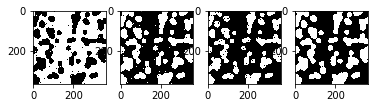

In [116]:
from skimage.util import random_noise
from skimage import io

image = io.imread('assets/cellsMorpho.png',as_gray=True)*255

thresh_min = 150 # threshold_minimum(image)
binary_min = image < thresh_min

# Remove noise with Ouverture: erosion -> dilation

# First, we erode the image to remove the outer white points (noise)
eroded_img = ndimage.binary_erosion(binary_min, structure=np.ones((3, 3)))

# Then, we dilate the image to fill the inner black points (blank)
dilated_img = ndimage.binary_dilation(eroded_img, structure=np.ones((4, 4)))

fig, ax = plt.subplots(ncols=4)

ax[0].imshow(image, cmap='gray', interpolation='nearest')
ax[1].imshow(binary_min, cmap='gray', interpolation='nearest')
ax[2].imshow(eroded_img, cmap='gray', interpolation='nearest')
ax[3].imshow(dilated_img, cmap='gray', interpolation='nearest')


### A vous de jouer

Dans les deux cas, trouvez la taille de l'élément structurant (il est carré) et l'enchainement des deux opérations réalisées.

<img src="images_slides/qmorpho1.png" width=40%>
<img src="images_slides/qmorpho2.png" width=40%>


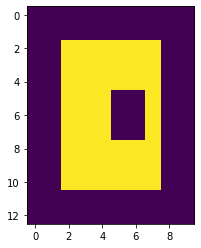

In [78]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)



plt.imshow(image);

# Convolution d'une image

## Pour : flouter, débruiter, extraire des contours

<img src="images_slides/conv0.png" width=60%>
<img src="images_slides/conv1.png" width=60%>
<img src="images_slides/conv2.png" width=60%>

## Comment ça marche : le principe général

* En pratique (cas discret), la convolution numérique d'une image se fera par une somme de produits.
* Un filtre de convolution est une matrice généralement (mais pas toujours) de taille impaire et symétrique (mais pas toujours).

Convolution d'une image par un filtre 2D:

$$I'(i,j)=I(i,j).filtre(i,j)$$
$$I'(i,j)=\sum_u\sum_v{I(i-u,j-v).filtre(u,v)}$$

En pratique: On place le noyeau du filtre sur le pixel voulu. Pour calculer le filtre, on multiplie le pixel sous une case C du filtre par la value contenue dans la case C du filtre. On calcule la somme S de tous les valeurs calculées précédemment. La somme S devient la valeur du pixel voulu

<img src="images_slides/conv4.png" width=60%>
<img src="images_slides/conv5.png" width=60%>
<img src="images_slides/conv6.png" width=60%>
<img src="images_slides/conv7.png" width=60%>


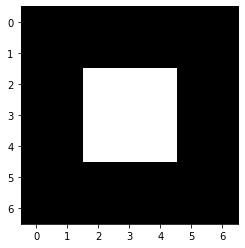

In [79]:
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
%precision 2
carre = np.zeros((7,7), dtype=float)
carre[2:5, 2:5]=1
fig, ax = plt.subplots()

ax.imshow(carre,cmap='gray')


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.33 0.67 1.   0.67 0.33 0.  ]
 [0.   0.22 0.44 0.67 0.44 0.22 0.  ]
 [0.   0.11 0.22 0.33 0.22 0.11 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


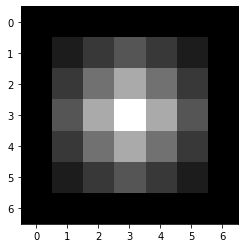

In [118]:
print(carre)

# np.full retourne un ndarray de taille (3, 3) dont les valeurs sont 1.0/n avec n le nombre de pixels
# du filtre soit 3*3 -> 9
filtre = np.full((3, 3), 1.0/9 )
print(filtre)

# 
blurred_img = ndi.correlate(carre, filtre)
print(blurred_img)

fig, ax = plt.subplots()

ax.imshow(blurred_img, cmap='gray')

In [81]:
#--------------------------------------------------------------------------
#  Convolution Demo
#--------------------------------------------------------------------------
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

def mean_filter_demo(image, vmax=1):
    mean_factor = 1.0 / 9.0  # This assumes a 3x3 kernel.
    iter_kernel_and_subimage = iter_kernel(image)

    image_cache = []

    def mean_filter_step(i_step):
        while i_step >= len(image_cache):
            filtered = image if i_step == 0 else image_cache[-1][-1][-1]
            filtered = filtered.copy()

            (i, j), mask, subimage = next(iter_kernel_and_subimage)
            filter_overlay = color.label2rgb(mask, image, bg_label=0,
                                             colors=('cyan', 'red'))
            filtered[i, j] = np.sum(mean_factor * subimage)
            image_cache.append(((i, j), (filter_overlay, filtered)))

        (i, j), images = image_cache[i_step]
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        
        for ax, imc in zip(axes, images):
            ax.imshow(imc, vmax=vmax, cmap='gray')
            rect = patches.Rectangle([j - 0.5, i - 0.5], 1, 1, color='yellow', fill=False)
            ax.add_patch(rect)
            
        plt.show()
    return mean_filter_step


def mean_filter_interactive_demo(image):
    from ipywidgets import IntSlider, interact
    mean_filter_step = mean_filter_demo(image)
    step_slider = IntSlider(min=0, max=image.size-1, value=0)
    interact(mean_filter_step, i_step=step_slider)


def iter_kernel(image, size=1):
    """ Yield position, kernel mask, and image for each pixel in the image.

    The kernel mask has a 2 at the center pixel and 1 around it. The actual
    width of the kernel is 2*size + 1.
    """
    width = 2*size + 1
    for (i, j), pixel in iter_pixels(image):
        mask = np.zeros(image.shape, dtype='int16')
        mask[i, j] = 1
        mask = ndi.grey_dilation(mask, size=width)
        #mask[i, j] = 2
        subimage = image[bounded_slice((i, j), image.shape[:2], size=size)]
        yield (i, j), mask, subimage


def iter_pixels(image):
    """ Yield pixel position (row, column) and pixel intensity. """
    height, width = image.shape[:2]
    for i in range(height):
        for j in range(width):
            yield (i, j), image[i, j]


def bounded_slice(center, xy_max, size=1, i_min=0):
    slices = []
    for i, i_max in zip(center, xy_max):
        slices.append(slice(max(i - size, i_min), min(i + size + 1, i_max)))
    return tuple(slices)

# From https://www.youtube.com/watch?v=d1CIV9irQAY

In [82]:
mean_filter_interactive_demo(carre)

interactive(children=(IntSlider(value=0, description='i_step', max=48), Output()), _dom_classes=('widget-inter…

### Que fait on des bords?

* Mettre à zéro
* Convolution partielle
* Sur une portion du noyau
* Miroir de l'image
* f(-x,y) = f(x,y)
* pas de solution miracle

<img src="images_slides/conv8.png" width=40%>




### Les poids ont un sens .

* Le masque de convolution représente un filtre linéaire permettant de modifier l’image
* On divisera le résultat de la convolution par la somme des coefficients du masque
* C’est pour éviter de modifier la luminance globale de l’image que la somme des coefficients doit être égale à 1


### Le Filtre moyenneur

Permet de lisser l’image (smoothing)

* Remplace chaque pixel par la valeur moyenne de ses voisins
* Réduit le bruit
* Réduit les détails non-important
* Brouille ou rend floue l’image (blur edges)


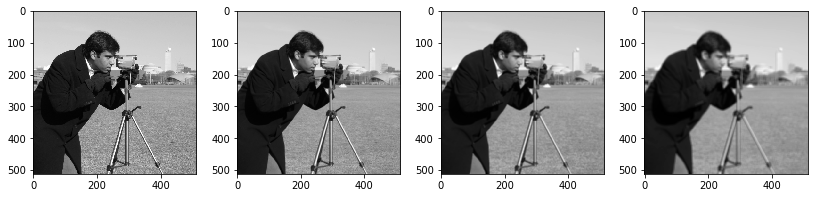

In [83]:
from skimage import data

img = data.camera()
mean_kernel_9 = np.full((3,3),1.0/9)
mean_kernel_25 = np.full((5,5),1.0/25)
mean_kernel_64 = np.full((8,8),1.0/64)

plt.figure(figsize=(14, 3))
plt.subplot(141)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.subplot(142)
plt.imshow(ndi.correlate(img, mean_kernel_9), cmap='gray', interpolation='nearest')
plt.subplot(143)
plt.imshow(ndi.correlate(img, mean_kernel_25), cmap='gray', interpolation='nearest')
plt.subplot(144)
plt.imshow(ndi.correlate(img, mean_kernel_64), cmap='gray', interpolation='nearest')





### Le Filtre Gaussien

Le filtre gaussien donnera un meilleure lissage et une meilleure réduction du bruit que le filtre moyenneur.

<img src="images_slides/conv13.png" width=60%>

avec sigma l'écart-type voulu soit la taille de la cloche

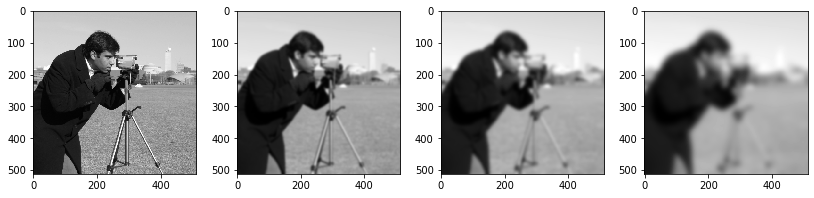

In [84]:
from skimage.data import astronaut
from skimage import filters
image = data.camera()

plt.figure(figsize=(14, 3))
plt.subplot(141)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.subplot(142)
plt.imshow(filters.gaussian(image, sigma=3), cmap='gray', interpolation='nearest')
plt.subplot(143)
plt.imshow(filters.gaussian(image, sigma=5), cmap='gray', interpolation='nearest')
plt.subplot(144)
plt.imshow(filters.gaussian(image, sigma=9), cmap='gray', interpolation='nearest')


### Filtre médian (moins sensible au bruit)
Pour nettoyer le bruit dans une image, il existe mieux que le filtre moyenneur ou le filtre gaussien
* Il s’agit du filtre médian
* C’est un filtre non-linéaire, qui ne peut pas s’implémenter comme un produit de convolution
* On remplace la valeur d’un pixel par la valeur médiane dans son voisinage NxN

<img src="images_slides/conv15.png" width=60%>

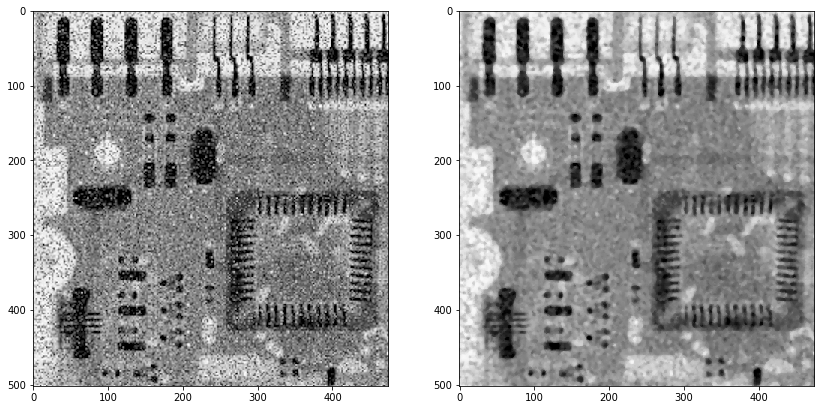

In [120]:
from skimage import io
from skimage.morphology import disk
from skimage.filters import median
image = io.imread('assets/median.png',as_gray=True)

med = median(image, disk(3))
plt.figure(figsize=(14, 10))
plt.subplot(121)
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.subplot(122)
plt.imshow(med, cmap='gray', interpolation='nearest')

# Détection de contours

Un contour est une variation brusque d’intensité

<img src="images_slides/c1.png" width=60%>
<img src="images_slides/c2.png" width=60%>


* Par définition, un contour est la frontière qui sépare deux objets dans une image (une discontinuité de l’image)
* Dans notre cas, nous détecterons toutes les lignes marquant des changements d’intensité
* Pas seulement les contours !
* Abus de langage sur la notion de contours !

<img src="images_slides/c3.png" width=60%>

Rappel : l'image est une fonction.
$$I: (x,y)\rightarrow I(x,y)$$

La première dérivée (gradient) de l'image est l'opérateur de base pour mesurer les contours dans l'image.

$$\nabla I=(\frac{\partial I(x,y)}{\partial x},\frac{\partial I(x,y)}{\partial y})$$

<img src="images_slides/c7.png" width=60%>

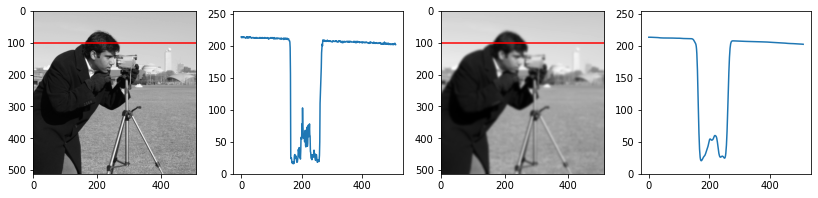

In [86]:
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

imageG = data.camera()
yAxis=100

plt.figure(figsize=(14, 3))

plt.subplot(141)
plt.imshow(imageG,cmap=plt.cm.gray);
plt.axhline(yAxis, color='r')



plt.subplot(142)
plt.ylim(0, 255)
plt.plot(imageG[yAxis,])


plt.subplot(143)
smooth = filters.gaussian(imageG, sigma=3)*255
plt.imshow(smooth,cmap=plt.cm.gray)
plt.axhline(yAxis, color='r')
plt.subplot(144)
plt.ylim(0, 255)
plt.plot(smooth[yAxis,])





In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

nbx = 512
x = np.linspace(0, 512, nbx,dtype=int)
y = smooth[yAxis,]
h = x[1]-x[0] # calcul du pas


yscale = sklearn.preprocessing.scale(y,with_mean=False,with_std=False)

# calcul des valeurs de la dérivée
yp = (y[1:] - y[:-1]) / h

ypscale = sklearn.preprocessing.scale(yp,with_mean=False,with_std=False)
plt.plot(x, yscale, label="f(x)")
plt.plot(x[:-1], ypscale, label="f'(x)")

plt.legend()
plt.show()

ModuleNotFoundError: No module named 'sklearn'

## Notion de gradient

### "Force d'un contour"

$$\nabla I=(\frac{\partial I(x,y)}{\partial x},\frac{\partial I(x,y)}{\partial y})$$

<img src="images_slides/c12.png" width=50%>


* le gradient est un vecteur perpendiculaire au contour
* l'amplitude du gradient mesure la force du contour

<img src="images_slides/c13.png" width=40%>

Le gradient est caractérisé par un module $m$ et une direction $\phi$ dans l'image.

$$m=(\frac{\partial I(x,y)^2}{\partial x}+\frac{\partial I(x,y)^2}{\partial y})^{1/2}$$

$$\phi=arctan(\frac{\partial I(x,y)}{\partial y}/\frac{\partial I(x,y)}{\partial x})$$

### Dérivation par différences finies

Une image est discrète par nature. On cherche donc à approximer les dérivées par différences finies.

$$\nabla_x I(x,y)=I(x,y)-I(x-n,y)$$

ou alors:

$$\nabla_x I(x,y)=I(x+n,y)-I(x-n,y)$$
avec en général n=1.\\
Ces dérivées sont calculées par convolution de l'image avec un masque de différences

$$\begin{bmatrix}
-1&0&1\\
\end{bmatrix} $$



Opérateur de Prewitt:

$$
h1=1/3
\begin{bmatrix}
-1&0&1\\
-1&0&1\\
-1&0&1\\
\end{bmatrix} 
$$

$$
h2=1/3
\begin{bmatrix}
-1&-1&-1\\
0&0&0\\
1&1&1\\
\end{bmatrix} 
$$

Opérateur de Sobel:

$$
h1=1/4
\begin{bmatrix}
-1&0&1\\
-2&0&2\\
-1&0&1\\
\end{bmatrix} 
$$

$$
h2=1/4
\begin{bmatrix}
-1&-2&-1\\
0&0&0\\
1&2&1\\
\end{bmatrix} 
$$


Opérateur de Prewitt: moyenneur + dérivée
$$
\begin{bmatrix}
-1&0&1\\
-1&0&1\\
-1&0&1\\
\end{bmatrix} 
=
\begin{bmatrix}
1\\
1\\
1\\
\end{bmatrix} 
*
\begin{bmatrix}
-1&0&1\\
\end{bmatrix} 
$$


Opérateur de Sobel: Gaussienne + dérivée

$$
\begin{bmatrix}
-1&0&1\\
-2&0&2\\
-1&0&1\\
\end{bmatrix} 
=
\begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix} 
*
\begin{bmatrix}
-1&0&1\\
\end{bmatrix} 
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.data import camera

#camera = data.camera()
#camera = io.imread('assets/lena.png',as_gray=True)*255
camera = io.imread('assets/laplace.png',as_gray=True)*255

edges = filters.sobel(camera)

plt.figure(figsize=(14, 3))

plt.subplot(141)
plt.imshow(camera,cmap=plt.cm.gray);


plt.subplot(142)
plt.imshow(abs(filters.sobel_v(camera)),cmap=plt.cm.gray);

plt.subplot(143)
plt.imshow(abs(filters.sobel_h(camera)),cmap=plt.cm.gray);

plt.subplot(144)
plt.imshow(edges,cmap=plt.cm.gray);


#skimage.filters.sobel_v



## Deuxième dérivée de l'image

* Une autre approche pour trouver les contours de l'image est d'utiliser la dérivée seconde de l'image
* Pour cela on utilise le Laplacien comme opérateur

$$\nabla^2 I=\frac{\partial I}{\partial x^2}+\frac{\partial I}{\partial y^2}$$

Les contours correspondent :

* Aux maxima de la première dérivée
* Aux passages par zéros de la deuxième dérivée



 <img src="images_slides/c15.png" width=20%>
  <img src="images_slides/c16.png" width=50%>
    <img src="images_slides/c17.png" width=50%>
      <img src="images_slides/c18.png" width=50%>
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

nbx = 512
x = np.linspace(0, 512, nbx,dtype=int)
y = smooth[yAxis,]
h = x[1]-x[0] # calcul du pas


yscale = sklearn.preprocessing.scale(y,with_mean=True,with_std=True)

# calcul des valeurs de la dérivée
yp = (y[1:] - y[:-1]) / h

ys =  (yp[1:] - yp[:-1]) / h

ypscale = sklearn.preprocessing.scale(yp,with_mean=False,with_std=False)

ysscale = sklearn.preprocessing.scale(ys,with_mean=False,with_std=False)


plt.plot(x, yscale, label="f(x)")
plt.plot(x[:-1], ypscale, label="f'(x)")
plt.plot(x[:-2], ysscale, label="f''(x)")

plt.legend()
plt.show()

L'estimation du laplacien d'une image se fait de la même manière par convolution de l'image avec un masque. Le laplacien est approximé par différences finies :
$$
\begin{bmatrix}
0&1&0\\
1&-4&1\\
0&1&0\\
\end{bmatrix} 
$$
ou
$$
\begin{bmatrix}
1&1&1\\
1&-8&1\\
1&1&1\\
\end{bmatrix} 
$$


Une seule matrice de convolution!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.data import camera

#camera = data.camera()
#camera = io.imread('assets/lena.png',as_gray=True)*255
camera = io.imread('assets/laplace.png',as_gray=True)*255


plt.figure(figsize=(14, 3))

plt.subplot(131)
plt.imshow(camera,cmap=plt.cm.gray);


plt.subplot(132)
plt.imshow(abs(filters.laplace(camera,ksize=3)),cmap=plt.cm.gray);

plt.subplot(133)
plt.imshow(abs(filters.laplace(camera,ksize=5)),cmap=plt.cm.gray);


## Détection de contours : seuillage du gradient


les points de contour dans une image sont caractérisés par des extrema locaux du gradient. Une première approche consiste donc à :
* calculer la norme du gradient en tous point de l’image
* sélectionner les pixels à l’aide d’un seuil fixé a priori pour la norme du gradient.

Mais : ne permet pas de différencier efficacement les points de contour du bruit.


### Comment fixer au mieux le seuillage ?

<img src="images_slides/canny0.png" width=80%>

### Idée : s'aider de l'orientation du gradiant 

* Filtre optimal pour la détection des contours. Filtre en plusieurs étapes (pas seulement une convolution)
* Etant donnés
    * un modèle de contour (marche)
    * un modèle de bruit (blanc gaussien)

- Appliquer un filtre Gaussien sur l'image
	
    * Filtre passe-bas pour enlever le bruit

- Calculer l'intensité du gradient dans l'image
    * Filtre de Sobel en $X$ et $Y$
    * Calcul de la norme $|G|=|G_x|+|G_y|$

- Calculer les directions du gradient dans l'image
	* Direction du gradient $\theta= arctan(G_y / G_x)$
    * Arrondi des directions par multiples de $\pi/4$

<img src="images_slides/canny1.png" width=50%>

### Suppression des non-maxima 

Si la norme du gradient en un pixel (x,y) est inférieure à la norme du gradient d’un de ses 2 voisins le long de la direction du gradient, alors mettre la norme pour le pixel (x,y) à zéro.

<img src="images_slides/canny2.png" width=50%>

### Seuillage des contours :

Utilise deux seuils : un seuil haut Sh et un seuil bas Sb. Pour chaque pixel de la norme du gradient :
* Si norme(x,y) < Sb alors le pixel est mis à 0 ($\notin$ contour)
* Si norme(x,y) > Sh alors le pixel $\in$ contour
* Si Sb ≤ norme(x,y) ≤ Sh alors le pixel $\in$ contour s’il est connecté à un autre pixel déjà accepté comme contour.

<img src="images_slides/canny3.png" width=50%>

### Exemple

<img src="images_slides/canny4.png" width=50%>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma (for smoothing)
edges1 = feature.canny(im,sigma=1)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

#https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.canny